In [1]:
!pip install pycm

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 552kB 7.1MB/s 


In [6]:
from sklearn.model_selection import GridSearchCV        
from sklearn.pipeline import Pipeline , make_pipeline   # 여러 알고리즘을 적용해서 결과를 한 번에 볼 수 있게
from sklearn.preprocessing import StandardScaler        

##
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score   # 평가 지표들

## plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets    # 예제 데이터

##Model classification_분류 알고리즘_나이브 베이즈 빠져있음
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings("ignore")
from pycm import * 
#PyCM 라이브러리를 사용하여 confusion Martix


cancer = datasets.load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=0)
    



# 모델 하나하나에 대해 각 각의 파이프라인을 만들어줘야 함 / 스케일러 기본 적용!
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42 ,))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=42 , probability = True))])

pipe_gbm = Pipeline([('scl', StandardScaler()),
                     ('clf', GBM(n_estimators  = 100 , random_state = 42))])

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNN())])

pipe_tree = Pipeline([('scl', StandardScaler()),
                     ('clf', DecisionTreeClassifier(random_state = 42,))])

pipe_xg = Pipeline([('scl', StandardScaler()),
                     ('clf', XGBClassifier(n_estimators  = 100 , random_state = 42,))])


pipe_lgbm = Pipeline([('scl', StandardScaler()),
                     ('clf', LGBMClassifier(n_estimators  = 100 , random_state = 42,))])

aram_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
depth_range = [3,5,8]
min_samples_split_range = [0.5, 0.7 , 0.9]
param_range = [0.5, 0.1]
param_range_fl = np.logspace(0,-5,5)
lr_rate=[0.01, 0.1, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                #    'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': depth_range,
                   'clf__min_samples_split': min_samples_split_range 
                  }]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
                    'clf__C': param_range
                   }]


grid_params_gbm = [{"clf__tol" : param_range_fl , 
                    'clf__max_depth': depth_range,
                    'clf__min_samples_leaf': param_range,
                    'clf__loss' : ["deviance", "exponential"]
                   } ]

grid_params_knn = [{"clf__n_neighbors" : [2,4,6] , 
                    "clf__weights" : ["uniform","distance"] , 
                    'clf__algorithm': ["ball_tree", "kd_tree", "brute"]
                   } ]

grid_params_tree = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': depth_range,
                   'clf__min_samples_split': min_samples_split_range 
                  }]

grid_params_xg = [{'clf__learning_rate': lr_rate,
                   'clf__max_depth': depth_range,
                  }]

grid_params_lgbm = [{'clf__learning_rate': lr_rate,
                   'clf__max_depth': depth_range,
                  }]

pipe = [
    pipe_lr , pipe_rf , pipe_svm , 
    pipe_gbm , pipe_knn ,pipe_tree , pipe_xg, pipe_lgbm
    ]
params = [
    grid_params_lr , grid_params_rf , grid_params_svm , 
    grid_params_gbm , grid_params_knn, grid_params_tree,
    grid_params_xg ,grid_params_lgbm
    ]

jobs = 20       # 숫자가 커질수록 연산 속도가 빨라짐
cv=5

grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest', 
             2: 'Support Vector Machine' ,
             3: "GradientBoostingClassifer" ,
             4: "KNNClassifier" , 
             5: "DecisionTreeClassifier" , 
             6: "XGBClassifier" ,
             7: "LGBMClassifier"
            }

model_prob = {}
model_result = {}
model_result1 = {}
model_result2 = {}
model_result3 = {}
model_best_params = {}
model_confusion = {}


for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, iid=True , cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    
    y_pred = search.predict(X_test)
    try :
        y_prob = search.predict_proba(X_test)
    except Exception as e :
        pass
    model_result[grid_dict.get(idx)] = accuracy_score(y_test, y_pred) 
    model_result1[grid_dict.get(idx)] = precision_score(y_test, y_pred)
    model_result2[grid_dict.get(idx)] = recall_score(y_test, y_pred)
    model_result3[grid_dict.get(idx)] = f1_score(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_



[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    6.7s remaining:    2.9s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    6.8s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    8.4s
[Parallel(n_jobs=20)]: Done 180 out of 180 | elapsed:   28.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    5.5s
[Parallel(n_jobs=20)]: Done 300 out of 300 | elapsed:   45.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  90 out of  90 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 2

                   algorithm       auc precision    recall        f1
7             LGBMClassifier  0.982456  0.972973         1  0.986301
0        Logistic Regression  0.976608  0.972727  0.990741  0.981651
3  GradientBoostingClassifer  0.976608  0.981481  0.981481  0.981481
6              XGBClassifier  0.976608  0.972727  0.990741  0.981651
2     Support Vector Machine   0.97076  0.972477  0.981481  0.976959
1              Random Forest  0.947368  0.945946  0.972222  0.958904
4              KNNClassifier  0.947368  0.938053  0.981481  0.959276
5     DecisionTreeClassifier  0.894737  0.887931  0.953704  0.919643


,algorithm,best_parameters
0,Logistic Regression,"{'clf__penalty': 'l2', 'clf__solver': 'liblinear'}"
1,Random Forest,"{'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 0.1, 'clf__min_samples_split': 0.5}"
2,Support Vector Machine,"{'clf__C': 0.1, 'clf__kernel': 'linear'}"
3,GradientBoostingClassifer,"{'clf__loss': 'exponential', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.1, 'clf__tol': 1.0}"
4,KNNClassifier,"{'clf__algorithm': 'ball_tree', 'clf__n_neighbors': 4, 'clf__weights': 'distance'}"
5,DecisionTreeClassifier,"{'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 0.1, 'clf__min_samples_split': 0.5}"
6,XGBClassifier,"{'clf__learning_rate': 0.1, 'clf__max_depth': 5}"
7,LGBMClassifier,"{'clf__learning_rate': 0.1, 'clf__max_depth': 3}"


                   algorithm       auc
7             LGBMClassifier  0.982456
0        Logistic Regression  0.976608
3  GradientBoostingClassifer  0.976608
6              XGBClassifier  0.976608
2     Support Vector Machine   0.97076
1              Random Forest  0.947368
4              KNNClassifier  0.947368
5     DecisionTreeClassifier  0.894737


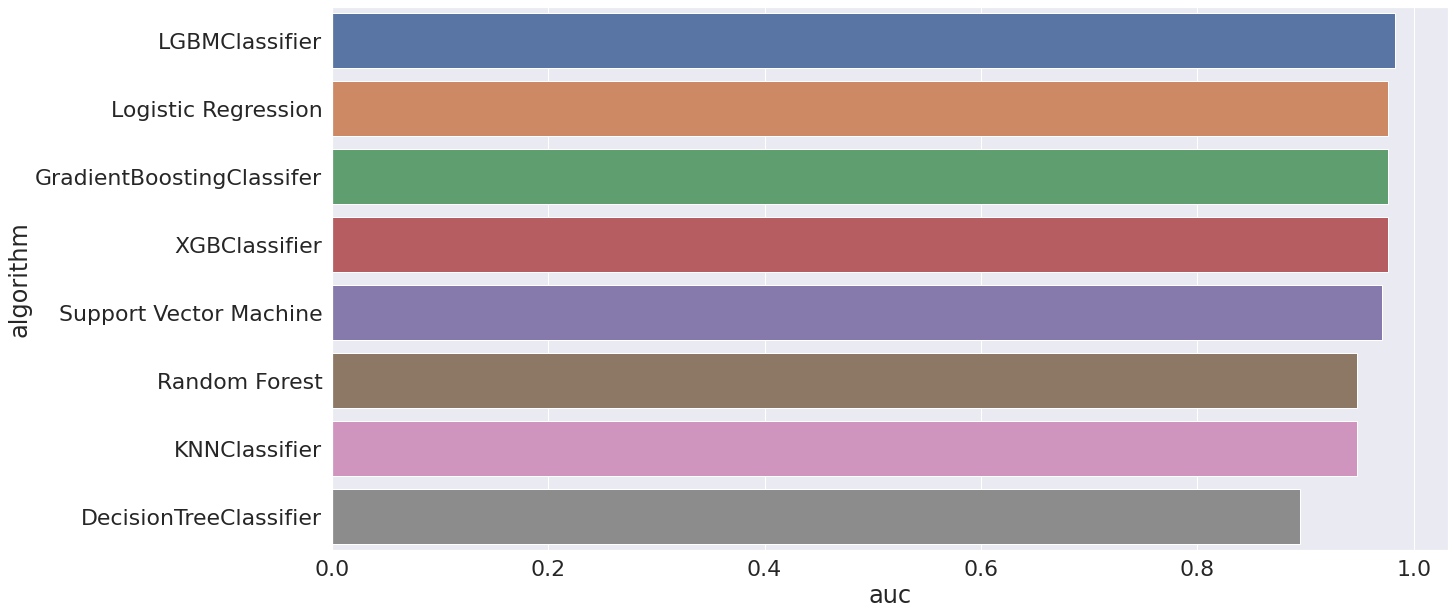

In [14]:
pd.set_option('display.max.colwidth', 150)

output = pd.DataFrame([model_result.keys(), 
                       model_result.values(),
                       model_result1.values(),
                       model_result2.values(),
                       model_result3.values()],
                      index = ["algorithm","auc","precision","recall","f1"]).T  # T 트랜스포즈: 행렬변환
output.sort_values(["auc"], ascending= False ,inplace=True)
print(output)

best_parameter = pd.DataFrame([model_result.keys(),
                               model_best_params.values()],
                              index = ["algorithm", "best_parameters"]).T
display(best_parameter)

dataset= output.iloc[:,0:2]
print(dataset)
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
sns.barplot(y="algorithm", x="auc", data=dataset)
plt.show()